# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
%matplotlib inline
import datetime

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
signnames = pd.read_csv("signnames.csv").set_index("ClassId")["SignName"]

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Potting few examples from the dataset

In [5]:
def plot_image(ax, img, title=""):
    if img.shape[-1] == 1:
        ax.imshow(img[:,:,0], cmap='Greys_r')
    else:
        ax.imshow(img[:,:,:])            
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

In [6]:
def plot_samples(X, y, cols=4, rows=4, size=5, sample=True):
    num_examples = rows * cols
    num_examples = min(X.shape[0], num_examples)
    f, ax = plt.subplots(rows, cols, figsize=(cols*size,rows*size))
    ax = ax.ravel()
    for i in range(num_examples):
        if sample:
            n = np.random.randint(X.shape[0])
        else:
            n = i
        if y is None:            
            title = ""
        else:
            title = signnames[y[n]]
        plot_image(ax[i], X[n,:,:,:], title)

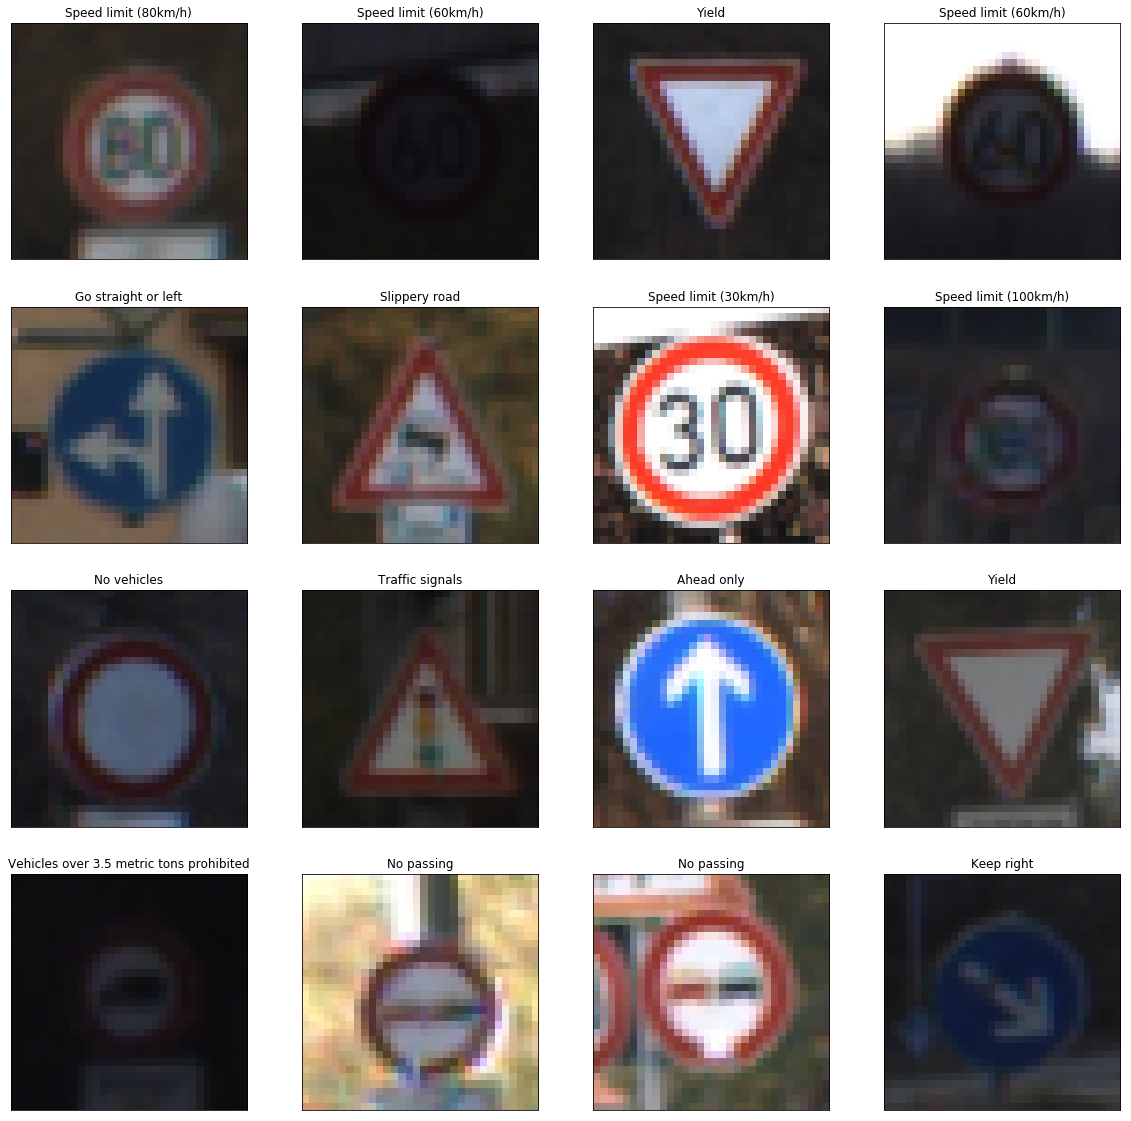

In [7]:
plot_samples(X_train, y_train)

### Getting grayscale images

In [8]:
def grayscale(X):
    X_gray = np.zeros(X.shape[:-1])
    for i in range(X.shape[0]):
        X_gray[i,:,:] = cv2.cvtColor(X[i,:,:,:], cv2.COLOR_RGB2GRAY)
    return X_gray.reshape((X_gray.shape[0],X_gray.shape[1],X_gray.shape[2],1))

In [9]:
X_train_gray = grayscale(X_train)  

In [9]:
def plot_side_by_side(X, X_transformed, y, cols=2, rows=4, size=5):
    cols = cols * 2 #we need to plot orignal and transformed images
    num_examples = rows * cols
    f, ax = plt.subplots(rows, cols, figsize=(cols*size,rows*size))
    ax = ax.ravel()
    for i in range(0, num_examples, 2):        
        n = np.random.randint(X.shape[0])
        plot_image(ax[i], X[n,:,:,:], signnames[y[n]])
        plot_image(ax[i+1], X_transformed[n,:,:,:], signnames[y[n]])

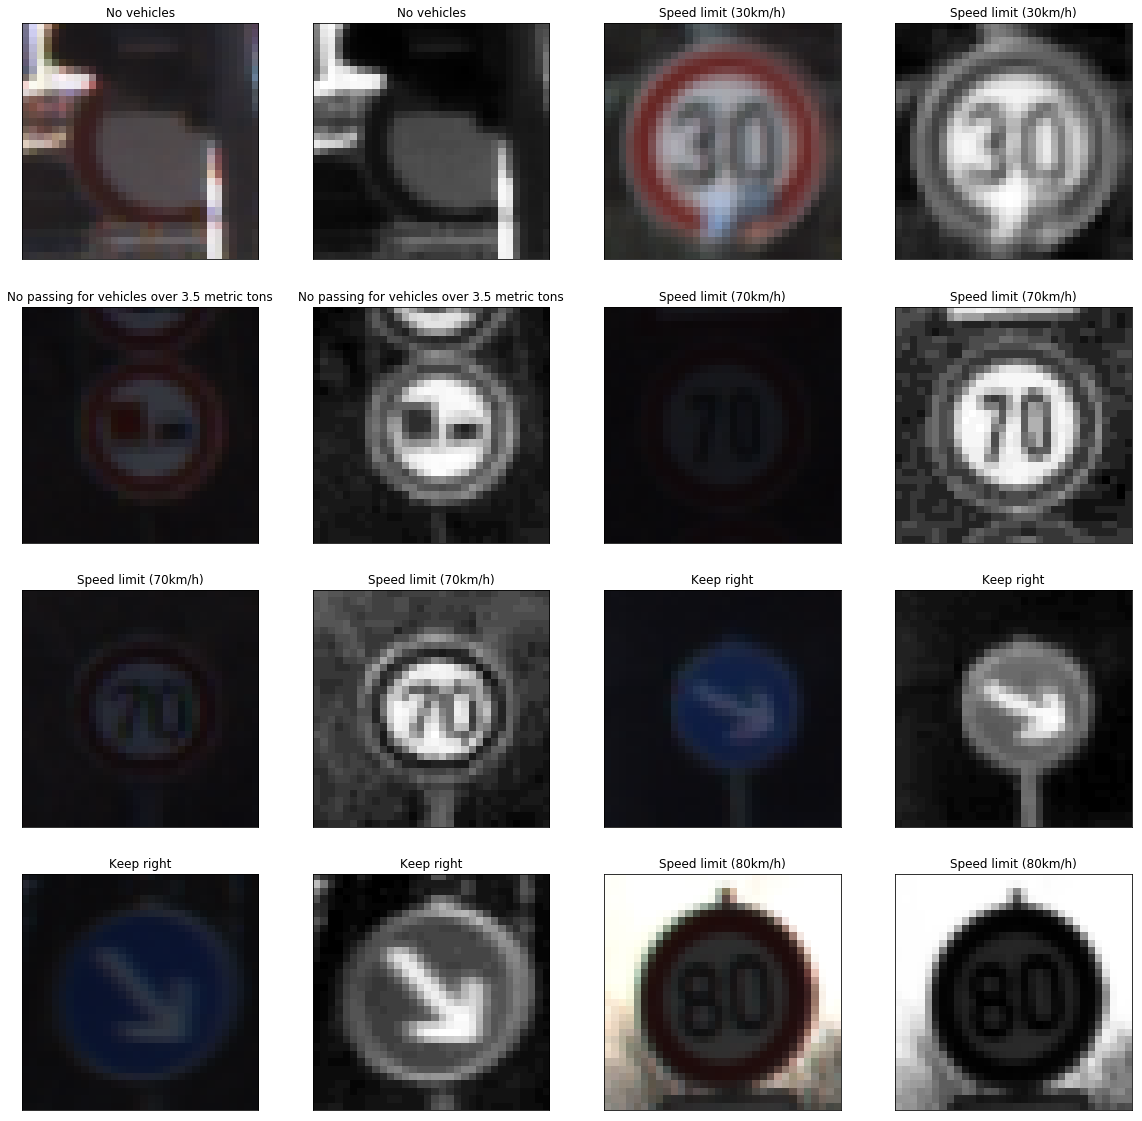

In [11]:
plot_side_by_side(X_train, X_train_gray, y_train)

### Looking at label distribution

In [10]:
def plot_label_dist(y, names):
    s = pd.Series(y_train)
    df = pd.DataFrame({
        'counts':s.value_counts()
        ,'percentage':s.value_counts(normalize=True).round(4)*100
    }).join(signnames).set_index("SignName")
    print("Total #lables: {}".format(len(df)))
    df.plot.bar(x=df.index, y="percentage", figsize=(16,9))

Total #lables: 43


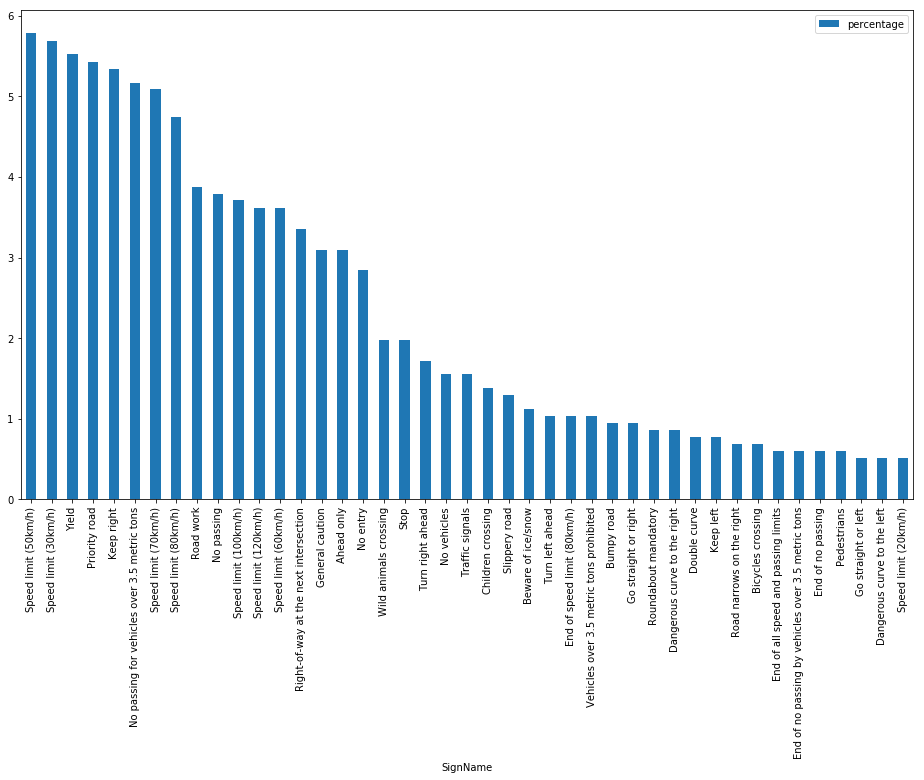

In [11]:
plot_label_dist(y_train, signnames)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model

Using TensorFlow backend.


In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [13]:
def normalize(X):
    X_tmp = (((X - X.min()).astype(float)/X.max())-0.5)*2
    return X_tmp

In [14]:
def resize(X, width=224, height=224):
    X_new = np.zeros((X.shape[0], width, height, X.shape[-1]))
    for i in range(X.shape[0]):
        X_new[i,:,:,:] = cv2.resize(X[i,:,:,:],(width, height), interpolation = cv2.INTER_CUBIC)
    return X_new

In [15]:
X = {
        "train": X_train
        ,"test": X_test
        ,"valid": X_valid
    }

Y = {
        "train": y_train
        ,"test": y_test
        ,"valid": y_valid
    }

In [16]:
def apply_transform(X, transforms):
    tmp = {}
    for k in X:
        tmp[k] = X[k]
        for t in transforms:
            tmp[k] = t(tmp[k])
    return tmp

In [17]:
# convert class vectors to binary class matrices
y_train_one_hot = keras.utils.to_categorical(y_train, n_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, n_classes)
y_valid_one_hot = keras.utils.to_categorical(y_valid, n_classes)

In [18]:
Y_one_hot = {
        "train": y_train_one_hot
        ,"test": y_test_one_hot
        ,"valid": y_valid_one_hot
    }

### Model Architecture

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## Basic CNN model
Modeled after Keras example https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py <br>
I added few layers to the above model to get the accuracy from 93% to 97%.

In [20]:
def basic_cnn_model(image_shape, n_classes, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy']):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=image_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=metrics)
    return model

In [21]:
basic_cnn_model(image_shape=image_shape, n_classes=n_classes).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
__________

### Using a pretrained model

In [22]:
vgg = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=(48,48,3))

In [23]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [24]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [35]:
# create the base pre-trained model
base_model = vgg

# add a global spatial average pooling layer
x = base_model.output
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(n_classes, activation='softmax')(x)

# this is the model we will train
vgg1 = Model(input=base_model.input, output=predictions)

vgg1.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


In [36]:
vgg1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [29]:
X_48 = apply_transform(X, [lambda x: resize(x,width=48,height=48)])

In [37]:
train_model(X_48, Y_one_hot, vgg1, epochs=3)

Train on 34799 samples, validate on 12630 samples
Epoch 1/3
  512/34799 [..............................] - ETA: 4623s - loss: 13.9286 - acc: 0.0254

KeyboardInterrupt: 

### Train, Validate and Test the Model

In [27]:
def train_model(X, Y, model, batch_size = 256, epochs = 10):
    model.fit(X['train'], Y['train'],
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X['test'], Y['test']))

In [28]:
def evaluate_model(X, Y, model):
    accuracy = []
    loss = []
    dataset = []
    for k in X:
        score = model.evaluate(X[k], Y[k], verbose=0)
        loss.append(score[0])
        accuracy.append(score[1])
        dataset.append(k)
    df = pd.DataFrame({
        "dataset": dataset
        ,'accuracy': accuracy
        ,"loss": loss
    }).set_index("dataset")
    return df

In [32]:
model = basic_cnn_model(image_shape=image_shape, n_classes=n_classes)
train_model(X, Y_one_hot, model, epochs=3)

Train on 34799 samples, validate on 12630 samples
Epoch 1/3
34799/34799 [==============================] - 138s - loss: 5.3706 - acc: 0.0533 - val_loss: 3.5267 - val_acc: 0.1173

In [27]:
#model.save("base_model_{}.h5".format(datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S")))

In [22]:
##loading a saved model
model = load_model("base_model_2017_04_12_00_00_44.h5")

In [41]:
evaluate_model(X, Y_one_hot, model)

,accuracy,loss
dataset,,
test,0.957957,0.658075
train,0.995000,0.077994
valid,0.971882,0.445019


In [47]:
a = model.predict_classes(X['valid'])

4410/4410 [==============================] - 5s     

In [49]:
from sklearn.metrics import confusion_matrix

In [68]:
pd.set_option('max_columns', 100)

In [54]:
cm = pd.DataFrame(confusion_matrix(y_valid, a))

In [63]:
cm.index = signnames
cm.index.name = "True Label"
cm.columns = signnames

In [69]:
cm

SignName,Speed limit (20km/h),Speed limit (30km/h),Speed limit (50km/h),Speed limit (60km/h),Speed limit (70km/h),Speed limit (80km/h),End of speed limit (80km/h),Speed limit (100km/h),Speed limit (120km/h),No passing,No passing for vehicles over 3.5 metric tons,Right-of-way at the next intersection,Priority road,Yield,Stop,No vehicles,Vehicles over 3.5 metric tons prohibited,No entry,General caution,Dangerous curve to the left,Dangerous curve to the right,Double curve,Bumpy road,Slippery road,Road narrows on the right,Road work,Traffic signals,Pedestrians,Children crossing,Bicycles crossing,Beware of ice/snow,Wild animals crossing,End of all speed and passing limits,Turn right ahead,Turn left ahead,Ahead only,Go straight or right,Go straight or left,Keep right,Keep left,Roundabout mandatory,End of no passing,End of no passing by vehicles over 3.5 metric tons
True Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Speed limit (20km/h),30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (30km/h),0,238,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (50km/h),0,1,238,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (60km/h),0,0,0,148,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (70km/h),0,0,0,0,210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (80km/h),0,0,5,0,0,200,0,1,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
End of speed limit (80km/h),0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (100km/h),0,0,0,0,0,1,0,147,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Speed limit (120km/h),0,1,2,0,4,0,0,12,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [74]:
urls =[
    'http://a.rgbimg.com/cache1nHmS6/users/s/su/sundstrom/300/mifuUb0.jpg'
    #,'https://www.gumiabroncsakciok.hu/uploaded_images/t%C3%A9ligumi%20165_70r142.jpg'
    ,'http://signx.info/neon-signs/traffic-signs-german.jpg'
    ,'http://bicyclegermany.com/Images/Laws/100_1607.jpg'
    ,'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-German-traffic-sign-No-205-give-way-Stock-Photo.jpg'
    ,'http://www.expressway.online/oldsite/photogallery/signs/general/regulatory/images/giveway.jpg'
    ,'http://exviking.net/road/extra/elk.jpg'
    ,'http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381075'
    ,'http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381295'
]

In [75]:
import urllib
import matplotlib.image as mpimg
import os

In [76]:
for i, url in enumerate(urls):
    print(url)
    urllib.request.urlretrieve(url, "images/{}.jpg".format(i))

http://a.rgbimg.com/cache1nHmS6/users/s/su/sundstrom/300/mifuUb0.jpg
http://signx.info/neon-signs/traffic-signs-german.jpg
http://bicyclegermany.com/Images/Laws/100_1607.jpg
https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-German-traffic-sign-No-205-give-way-Stock-Photo.jpg
http://www.expressway.online/oldsite/photogallery/signs/general/regulatory/images/giveway.jpg
http://exviking.net/road/extra/elk.jpg
http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381075
http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381295


### Load and Output the Images

In [144]:
buf = []
for file in os.listdir("images/"):
    img = cv2.resize(mpimg.imread("images/"+file),(image_shape[0], image_shape[1])
                     , interpolation = cv2.INTER_CUBIC)
    buf.append(img)
test_images = np.array(buf)
test_images = test_images.astype(float)/255

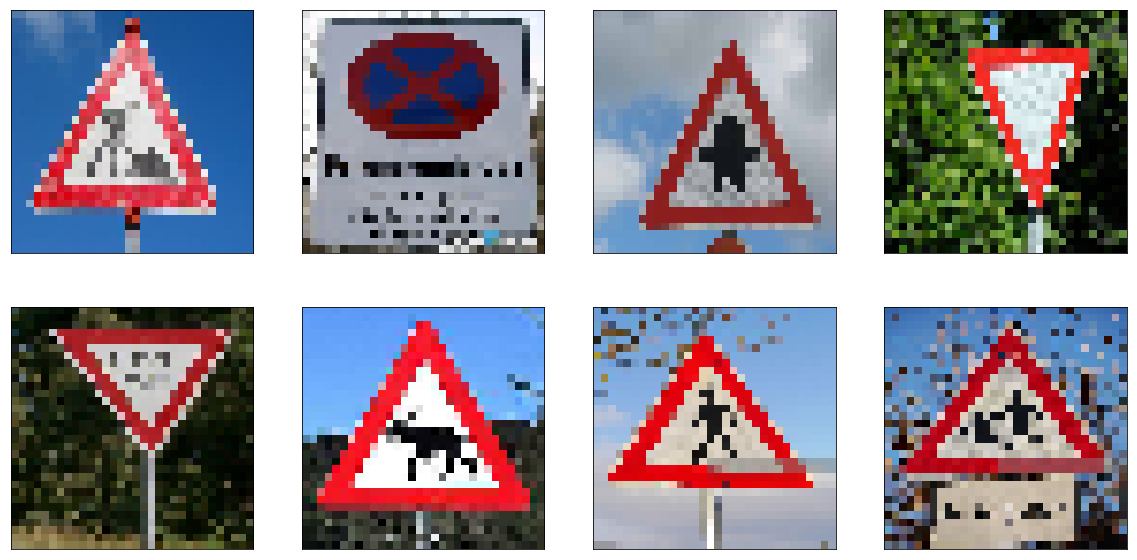

In [145]:
plot_samples(test_images,rows=2, y=None,sample=False)

### Predict the Sign Type for Each Image

In [146]:
predictions = model.predict_classes(test_images)
[signnames[x] for x in predictions]

8/8 [==============================] - 0s


['Road work',
 'No entry',
 'Right-of-way at the next intersection',
 'Yield',
 'Yield',
 'Slippery road',
 'General caution',
 'Slippery road']

In [140]:
buf = []
for i, p in enumerate(predictions):
    idxs_all = np.argwhere(y_valid==p).ravel()
    idxs = idxs_all[np.random.randint(idxs_all.shape[0], size=(6,))]
    buf.append(test_images[i,:,:,:])
    for idx in idxs:
        buf.append(X_valid[idx,:,:,:])
buf = np.array(buf)

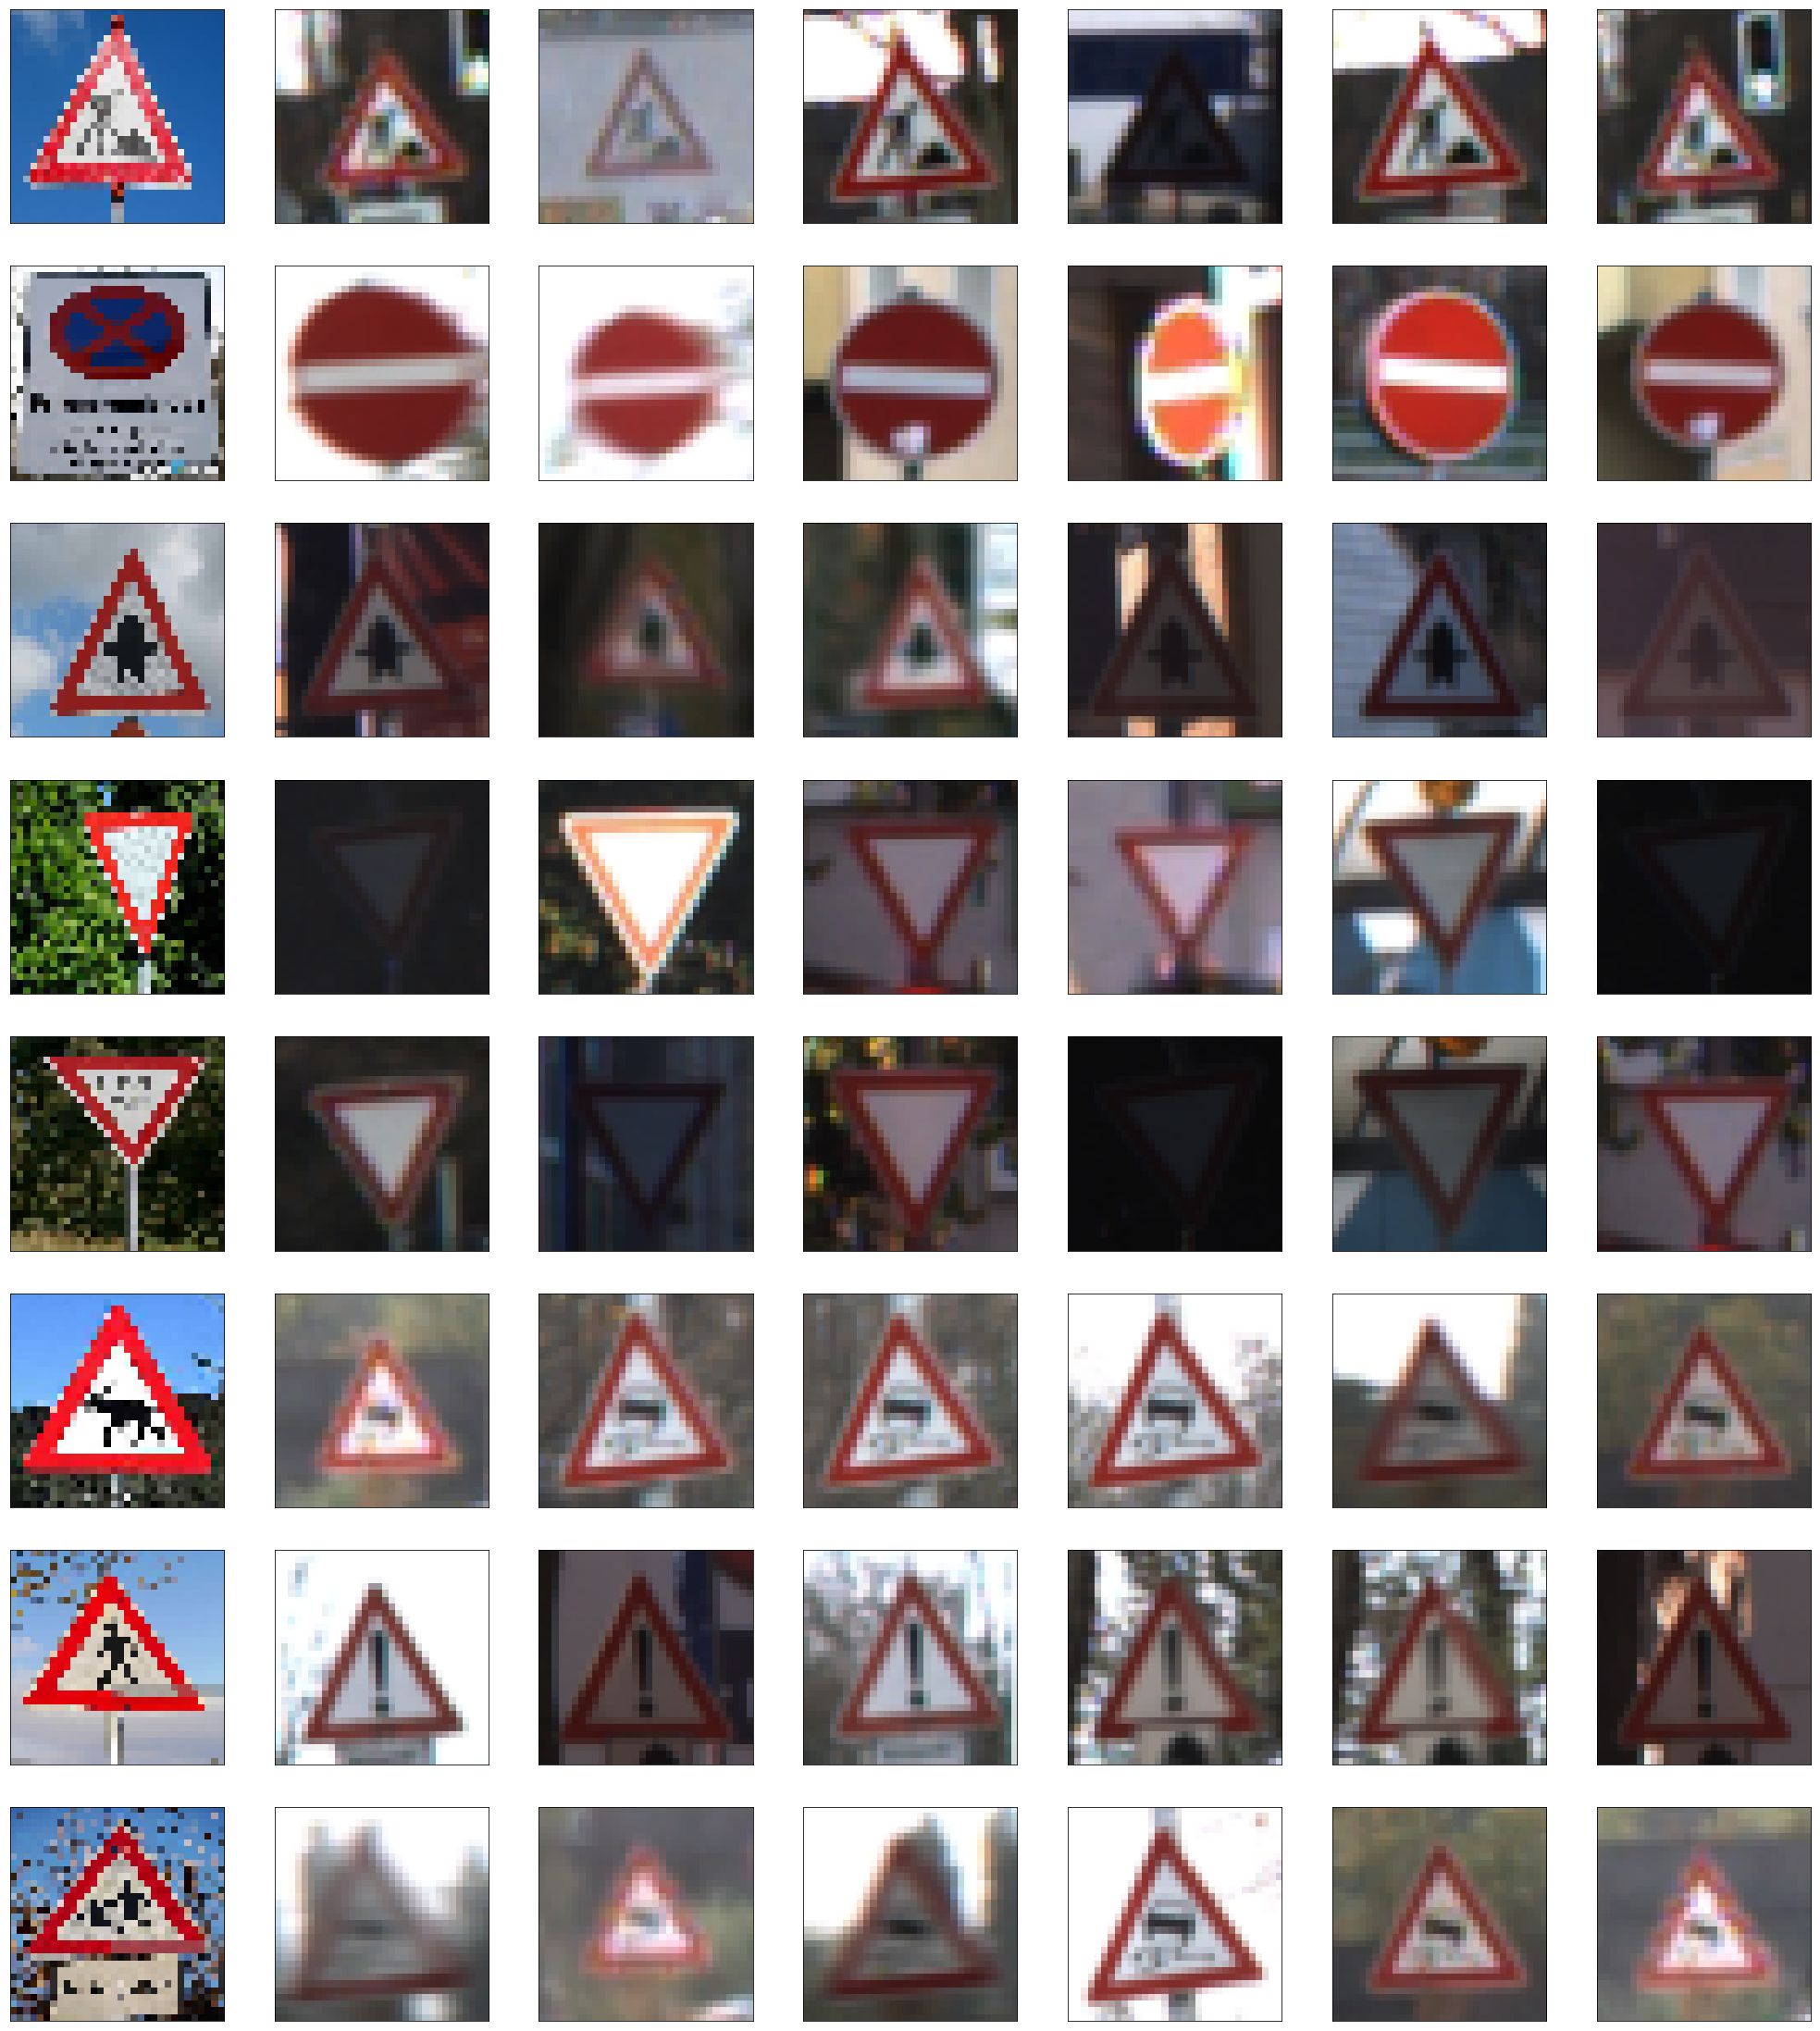

In [141]:
plot_samples(buf,y=None,rows=len(predictions), cols=7, sample=False)

In [128]:
def get_images_by_label(X, y, labels, size=4):
    buf = []
    for i, p in enumerate(labels):
        idxs_all = np.argwhere(y==p).ravel()
        idxs = idxs_all[np.random.randint(idxs_all.shape[0], size=(size,))]
        for idx in idxs:
            buf.append(X[idx,:,:,:])
    buf = np.array(buf)
    return buf

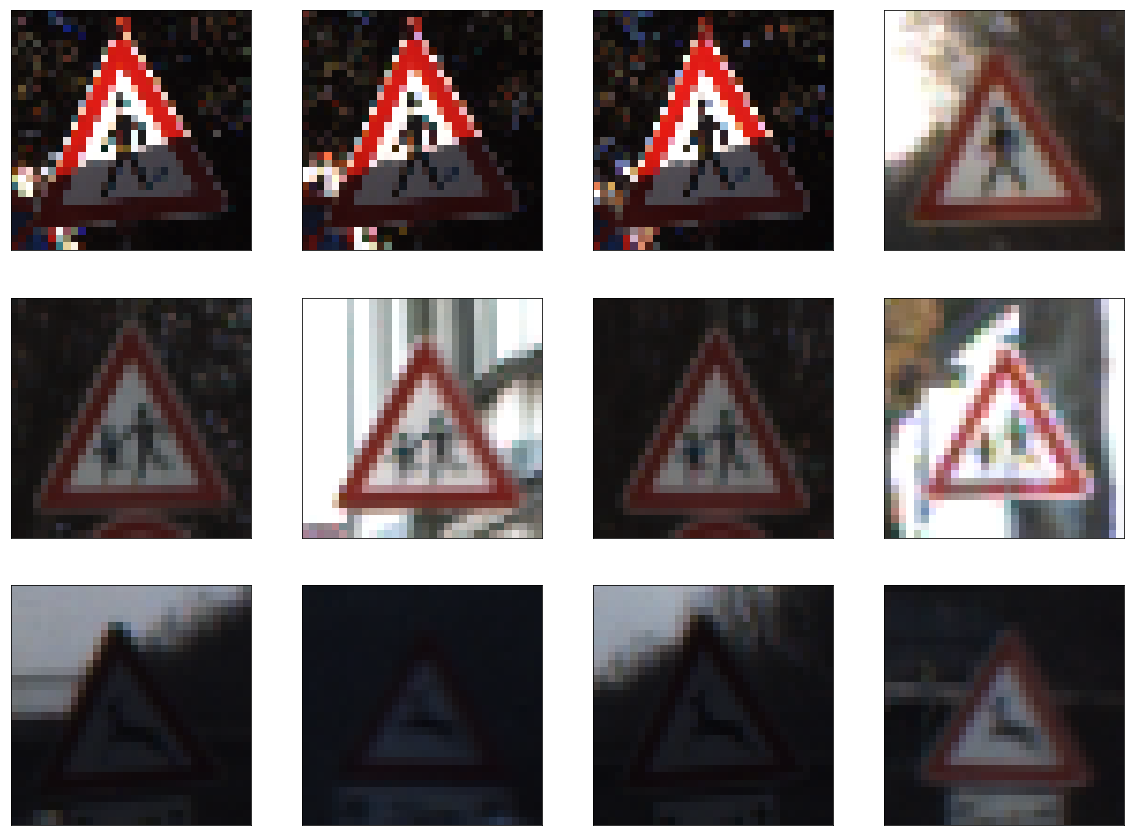

In [135]:
labels_tmp = [27, 28,31] 
buf = get_images_by_label(X_test, y_test, labels_tmp)
plot_samples(buf,None,rows=len(labels_tmp), cols=4, sample=False)

### Analyze Performance

Out of 8 images that I found on the internet, following are the results: <br>
1. The 2nd image doesn't seem to belong a traffic sign in our dataset, so ignoring it. <br>
2. Out of 7 predictions, 4 were right. Therefore the accuracy is around 57% with big error bars as the sample size is very small. <br>

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [147]:
predictions_prob = model.predict_proba(test_images)

8/8 [==============================] - 0s


SignName
Road work                    94.5028
Bicycles crossing             5.4969
Bumpy road                    0.0002
Beware of ice/snow            0.0001
Road narrows on the right     0.0000
Name: 0, dtype: float32

SignName
No entry                99.999901
Speed limit (20km/h)     0.000100
Speed limit (30km/h)     0.000000
Keep left                0.000000
Roundabout mandatory     0.000000
Name: 1, dtype: float32

SignName
Right-of-way at the next intersection           100.0
Beware of ice/snow                                0.0
Double curve                                      0.0
No passing for vehicles over 3.5 metric tons      0.0
Pedestrians                                       0.0
Name: 2, dtype: float32

SignName
Yield                                           98.833504
No passing for vehicles over 3.5 metric tons     0.791800
Speed limit (50km/h)                             0.148800
Priority road                                    0.141900
Ahead only                      

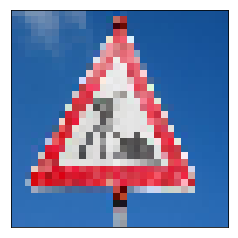

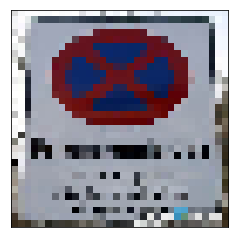

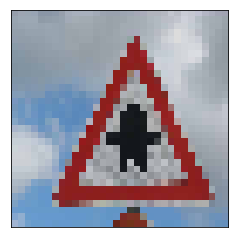

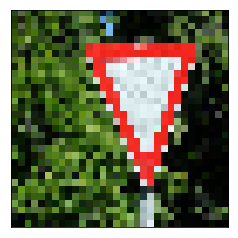

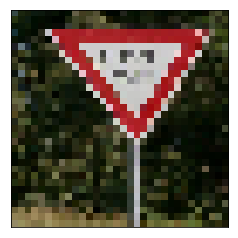

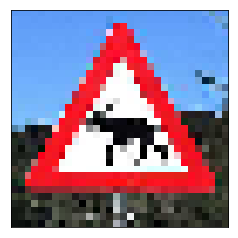

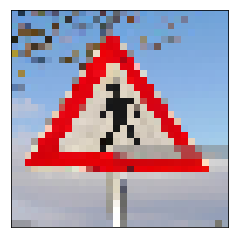

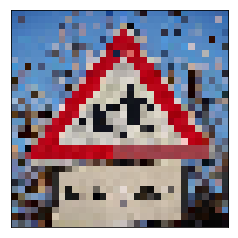

In [164]:
df = pd.DataFrame(predictions_prob.T).join(signnames).set_index("SignName")
for c, img in zip(df.columns, test_images):
    f,ax = plt.subplots()
    plot_image(ax, img)
    stats = df[c].sort_values(ascending=False).head(5).round(6)*100
    print(stats)
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")